<a href="https://www.kaggle.com/code/sailikhitarage/20bd1a6642-riceimage?scriptVersionId=112674864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary libraries**

In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [58]:
#os.listdir("../input/rice-image-dataset/Rice_Image_Dataset")

In [67]:
from matplotlib import image
im = plt.imread("../input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (10000).jpg")

In [68]:
im.shape

(250, 250, 3)

In [69]:
im.size

187500

In [70]:
from PIL import Image 
im = Image.open("../input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10004).jpg")

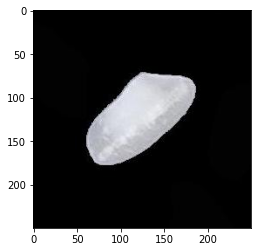

In [71]:
plt.imshow(im)

**Loading the dataset**

In [72]:
def Load_imgs(imagepath):
    imgs = []
    label = []
    l1 = os.listdir(imagepath)
    for i in l1:
        if i!="Rice_Citation_Request.txt":
            l2 = os.listdir(imagepath+'/'+i)
            for j in l2:
                img = Image.open(imagepath+'/'+i+'/'+j)
                img = img.resize(size=(32,32))
                img = img.convert('L')
                imgs.append(np.array(img).flatten())
                label.append(i)
                del img
    return np.array(imgs),label

In [73]:
x,y = Load_imgs("../input/rice-image-dataset/Rice_Image_Dataset/")

In [74]:
x.shape

(75000, 1024)

In [75]:
len(y)

75000

**Data Preprocessing**

In [76]:
target = pd.Series(y,dtype='category')
target

0        Karacadag
1        Karacadag
2        Karacadag
3        Karacadag
4        Karacadag
           ...    
74995       Ipsala
74996       Ipsala
74997       Ipsala
74998       Ipsala
74999       Ipsala
Length: 75000, dtype: category
Categories (5, object): ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [77]:
target.value_counts()

Arborio      15000
Basmati      15000
Ipsala       15000
Jasmine      15000
Karacadag    15000
dtype: int64

**converting labels to numerical values**

In [78]:
t = target.cat.codes

In [79]:
t

0        4
1        4
2        4
3        4
4        4
        ..
74995    2
74996    2
74997    2
74998    2
74999    2
Length: 75000, dtype: int8

In [80]:
dicti = dict(enumerate(target.cat.categories))

In [81]:
dicti

{0: 'Arborio', 1: 'Basmati', 2: 'Ipsala', 3: 'Jasmine', 4: 'Karacadag'}

**Splitting data into train and test**

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.25,random_state=1,shuffle=True)

In [83]:
len(x_train)

56250

In [84]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [85]:
LR_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [86]:
LR_model.score(x_test,y_test)

0.9702933333333333

**ANN model**

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation='relu',name='sh_dense1'))
model.add(Dense(120,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax',name='sh_Dense2'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Number of parameters in each layer**

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense_2 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


Total number of parameters are 105,661

**Fitiing the model**

In [89]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.3990 - accuracy: 0.9187
Epoch 2/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9554
Epoch 3/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.1124 - accuracy: 0.9618
Epoch 4/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.1027 - accuracy: 0.9652
Epoch 5/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9674
Epoch 6/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.0935 - accuracy: 0.9688
Epoch 7/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9702
Epoch 8/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9714
Epoch 9/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9715
Epoch 10/10
1758/1758 [==============================] - 4s 2ms/step - loss: 0.082

**predicting labels for test data**

In [90]:
y_pred = model.predict(x_test)

**Evaluating accuracy for train data**

In [91]:
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))

1758/1758 [==============================] - 3s 2ms/step - loss: 0.1477 - accuracy: 0.9593
Accuracy: 95.93


**Evaluating accuracy for test data**

In [92]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9552
Accuracy: 95.52


**Predicting the label for Real-time image**

In [99]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((32,32)).convert('L'))
    x1 = x.flatten()
    x1 = x1.reshape(-1,32*32)
    res = model.predict_on_batch(x1)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + dicti[classification])

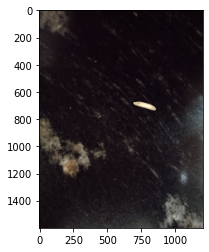

In [102]:
img = plt.imread("/kaggle/input/realtime-test/Basmati.jpg")
img = Image.open(r"/kaggle/input/realtime-test/Basmati.jpg")
plt.imshow(img)

100.0% Confidence Basmati


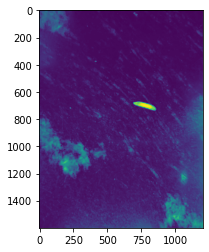

In [103]:
img = img.convert('L')
Prediction(img)